In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [2]:
# Assuming the file name is 'seattle-weather.csv'
df = pd.read_csv('seattle-weather.csv')

In [3]:
# Step 3: Select relevant features and target
# Selecting features and target (predicting 'precipitation')
features = df[['temp_max', 'temp_min', 'wind']]
target = df['precipitation']

# Step 4: Normalize the features
features = (features - features.mean()) / features.std()

In [4]:
# Step 5: Prepare data for RNN
X = np.array(features).reshape(features.shape[0], 1, features.shape[1])  # Reshape for RNN
y = np.array(target)

In [5]:
# Step 6: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 7: Build the RNN model
model = Sequential([
    SimpleRNN(10, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dense(1)  # Output layer for regression
    ])
model.compile(optimizer='adam', loss='mean_squared_error')


In [9]:
# Step 8: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 52.2039
Epoch 2/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 48.5821
Epoch 3/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 39.0893
Epoch 4/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 31.6134
Epoch 5/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 38.1960
Epoch 6/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 40.7032
Epoch 7/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 37.1621
Epoch 8/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 36.0116
Epoch 9/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 36.3668
Epoch 10/10
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 37.9000


In [10]:
# Step 9: Evaluate the model
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [11]:
# Step 10: Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Error: {r2}")

Mean Squared Error: 30.740181835019726
R^2 Error: 0.20821304014765185


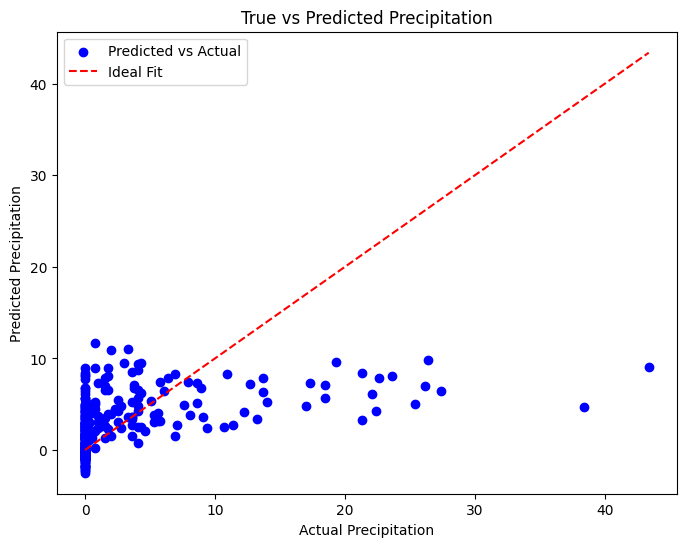

In [12]:
# Step 11: Plot true vs predicted precipitation
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Precipitation')
plt.ylabel('Predicted Precipitation')
plt.title('True vs Predicted Precipitation')
plt.legend()
plt.show()